# Decision Boundary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tqdm import tqdm

In [2]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

print(f"X = {X}")
print(f"Y = {y}")

X = [[-5.85599836  4.65179333]
 [-5.83379108 -3.27474928]
 [ 7.43301143  6.88024374]
 ...
 [-2.43650847  4.97436946]
 [-2.06889414  4.04932731]
 [-9.73360422 -6.17862924]]
Y = [0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0

In [3]:
X_df = pd.DataFrame(X, columns=["x1", "x2"])
X_df.head()

,x1,x2
0,-5.855998,4.651793
1,-5.833791,-3.274749
2,7.433011,6.880244
3,-8.022102,-0.956644
4,-14.719933,-3.651568


In [4]:
y_df = pd.DataFrame(y, columns=["class"])
y_df.head()

,class
0,0
1,1
2,0
3,1
4,1


In [5]:
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
data.head()

,x1,x2,class
0,-5.855998,4.651793,0
1,-5.833791,-3.274749,1
2,7.433011,6.880244,0
3,-8.022102,-0.956644,1
4,-14.719933,-3.651568,1


<Axes: xlabel='x1', ylabel='x2'>

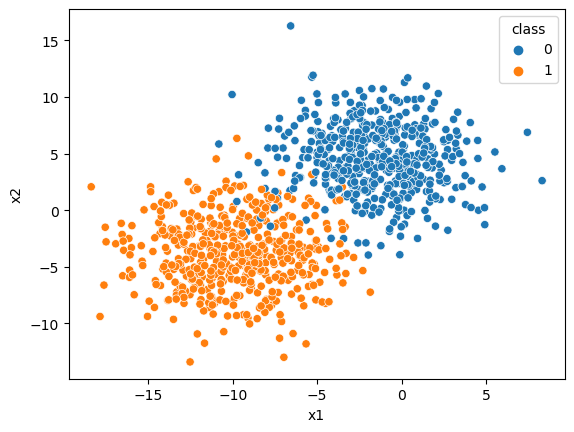

In [6]:
# create scatter plot for samples from each class
sns.scatterplot(x="x1", y="x2", hue='class', data=data)

In [7]:
# Using some algorithm to find the values of W_updated, and b_updated
W_updated, b_updated = np.array([-0.52425636, -0.75154691]), np.array([-2.270572739843222])

In [8]:
print(f"W_updated = {W_updated}")
print(f"b_updated = {b_updated}")

W_updated = [-0.52425636 -0.75154691]
b_updated = [-2.27057274]


<Axes: xlabel='x1', ylabel='x2'>

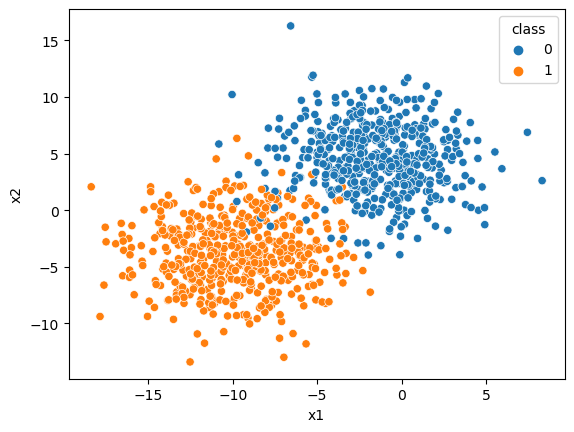

In [9]:
# create scatter plot for samples from each class
sns.scatterplot(x="x1", y="x2", hue='class', data=data)

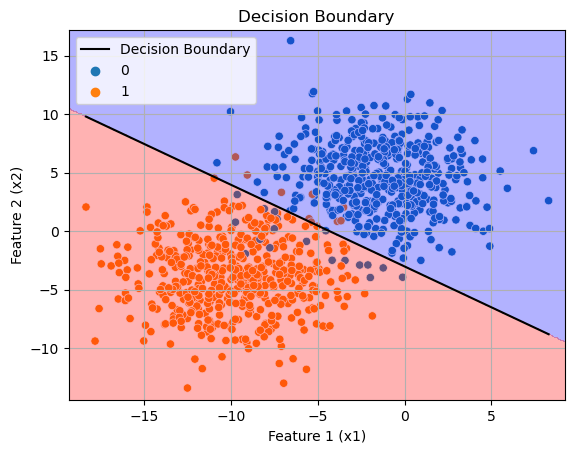

In [10]:
# ============================ Generate x values for the decision boundary line =========================================
x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = -(W_updated[0] * x_values + b_updated) / W_updated[1]
# Plot the decision boundary line 
plt.plot(x_values, y_values, label='Decision Boundary', color='black')


# Scatter plot for samples from each class
sns.scatterplot(x="x1", y="x2", hue='class', data=data)


# =================================== Create a meshgrid to evaluate model predictions ===================================
x_min, x_max = data['x1'].min() - 1, data['x1'].max() + 1
y_min, y_max = data['x2'].min() - 1, data['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each grid point
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W_updated) + b_updated
Z = np.sign(Z)
Z = Z.reshape(xx.shape)

# Create a contour plot to shade the background
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.array([-1, 0, 1]), colors=['blue', 'red'])
# ========================================================================================================================

plt.title("Decision Boundary")
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.legend()
plt.grid(True)